Q34 ハイパスフィルタ

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2

imori = cv2.imread("imori.jpg").astype(float)

def show_image(a):
    img_rgb = a[:,:,(2,1,0)]
    plt.imshow(img_rgb)
    plt.show()

def histgram(h_img):
    plt.hist(h_img.ravel(), bins=255, range=(0, 255), rwidth=0.7 )
    plt.show()

def show_gray(gray_img):
    plt.imshow(gray_img)
    plt.gray()
    plt.show()
    
def gray(gray_image):
    b = gray_image[:,:,0].copy()
    g = gray_image[:,:,1].copy()
    r = gray_image[:,:,2].copy()
    
    y = 0.2126*r + 0.7152*g + 0.0722*b
    y = y.astype(int)
    
    return y

# dftパラメータ
K = 128
L = 128

In [2]:
def dft(image):
    img = image.copy()
    h,w = img.shape
    
    G = np.zeros((h,w),dtype=complex)
    
    x = np.tile(np.arange(w),(h,1))
    y = np.arange(h).repeat(w).reshape(h,-1)
    
    for k in range(K):
        for l in range(L):
            G[k,l] = np.sum(img*np.exp(-2j*np.pi*(l*x/w + k*y/h)))/w
    
    return G

def idft(G):
    h,w = G.shape
    out = np.zeros((h,w))
    
    k = np.tile(np.arange(w),(h,1))
    l = np.arange(h).repeat(w).reshape(h,-1)
    
    for x in range(w):
        for y in range(h):
            out[y,x] = np.abs( np.sum(G*np.exp(2j*np.pi*(k*x/w + l*y/h))) )/w
    
    out = np.clip(out,0,255)
    return out.astype(int)

def HighFilter(G,ratio=0.5):
    h,w = G.shape
    G_swap = np.zeros((h,w),dtype=complex)
    
    G_swap[:h//2,:w//2] = G[h//2:,w//2:]
    G_swap[:h//2,w//2:] = G[h//2:,:w//2]
    G_swap[h//2:,:w//2] = G[:h//2,w//2:]
    G_swap[h//2:,w//2:] = G[:h//2,:w//2]
    
    x = np.tile(np.arange(w),(h,1))
    y = np.arange(h).repeat(w).reshape(h,-1)
    
    del_x = x - w//2
    del_y = y - h//2
    distance = np.sqrt(del_x**2 + del_y**2)
    flt = np.zeros((h,w),dtype=float)
    flt[distance > ratio*(np.sqrt(2)*(h//2))] = 1
    
    G_swap = G_swap*flt
    
    G[h//2:,w//2:] = G_swap[:h//2,:w//2]
    G[h//2:,:w//2] = G_swap[:h//2,w//2:]
    G[:h//2,w//2:] = G_swap[h//2:,:w//2]
    G[:h//2,:w//2] = G_swap[h//2:,w//2:] 
    
    return G

In [3]:
gray_img = gray(imori)
G = dft(gray_img)

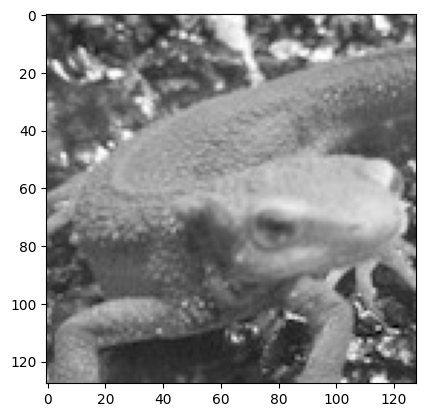

In [4]:
show_gray(gray_img)

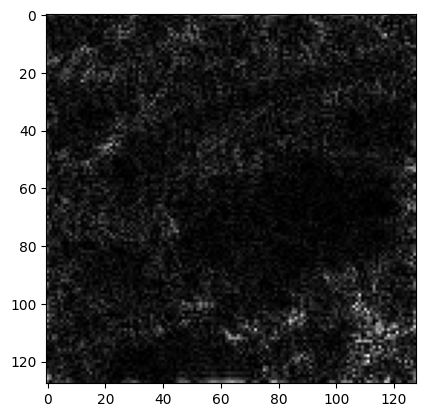

In [6]:
low_G = HighFilter(G,0.4)
new_img = idft(low_G)
show_gray(new_img)